In [1]:
## Discrete Uniform Distributions

# Import all the usual imports from the Python for Data Analysis and Visualization Course.
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

Text(0.5,1,'Probability Mass Function for Dice Roll')

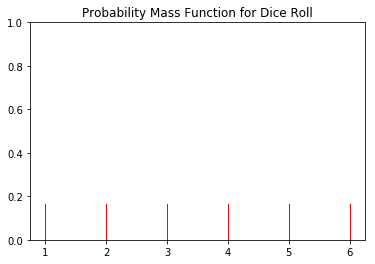

In [2]:
# Set up a Dice roll

# How about a roll of a dice?

# Let's check out the Probability Mass function!

# Each number
roll_choices = [1,2,3,4,5,6]

# Total probability space
tprob = 1

# Each roll has same odds of appearing (on a fair die at least)
prob_roll = tprob / len(roll_choices)

# Plot using seaborn rugplot (note this is not really a rugplot), setting height equal to probability of roll
uni_plot = sns.rugplot(roll_choices,height=prob_roll,c='red')

# Set Title
uni_plot.set_title('Probability Mass Function for Dice Roll')

In [4]:
# Mean and variance

from scipy.stats import randint

#Set up a low and high boundary for dice roll ( go to 7 since index starts at 0)
low,high = 1,7

# Get mean and variance
mean,var = randint.stats(low,high)

print ('The mean is %2.1f' %mean)
print ('The variance is %2.1f' %var)

The mean is 3.5
The variance is 2.9


<Container object of 6 artists>

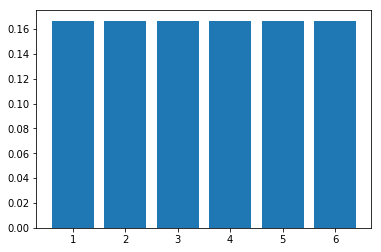

In [5]:
# Plot a bar chart using probablity mass function

plt.bar(roll_choices,randint.pmf(roll_choices,low,high))



In [8]:
## Continuos Uniform Distributions
'''Let's say on average, a taxi ride in NYC takes 22 minutes. After taking some time measurements from experiments
   we gather that all the taxi rides are uniformly distributed between 20 and 28 minutes. 
What is the probability density function of a taxi ride, or f(x)?'''


#Lower bound time
a = 20

#Upper bound time
b = 28

#Then using our probability density function we get
fx = 1.0/(b-a)

#show 
print ('The probability density function results in %1.3f' %fx)

The probability density function results in 0.125


In [9]:
#We can also get the variance 
var = ((b-a)**2 )/12

#Show
print ('The variance of the continous unifrom distribution is %1.1f' %var)

The variance of the continous unifrom distribution is 5.3


In [11]:
# lets calculate the probablity that ride will be done in 25 mins

#f(27)
fx_1 = 27.0/(b-a)
#f(25)
fx_2 = 25.0/(b-a)

#Our answer is then
ans = fx_1-fx_2

#print
print (' The probability that the taxi ride will last at least 25 minutes is %2.1f%%' %(100*ans))

 The probability that the taxi ride will last at least 25 minutes is 25.0%


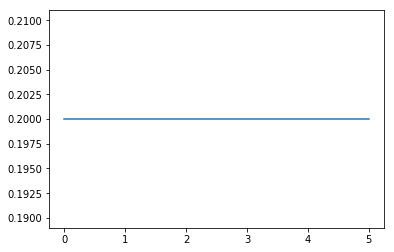

In [12]:
# lets use scipy to do the same things above

from scipy.stats import uniform
import numpy as np

#Let's set an A and B
A=0
B=5

# Set x as 100 linearly spaced points between A and B
x = np.linspace(A,B,100)

# Use uniform(loc=start point,scale=endpoint)
rv = uniform(loc=A,scale=B)

#Plot the PDF of that uniform distirbution
plt.plot(x,rv.pdf(x))

In [8]:
# Binomial Distributions

# Set up player A

# Probability of success for A
p_A = .72
# Number of shots for A
n_A = 11

# Make 6 shots
k = 6

# Now import scipy for combination
##import scipy.misc as sc
from scipy.special import comb as sc1

# Set up C(n,k)
comb_A = sc1(n_A,k)

# Now put it together to get the probability!
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

# Put the answer in percentage form!
answer_A = 100*answer_A




In [9]:
# Quickly repeat all steps for Player B
p_B = .48
n_B = 15
comb_B = sc1(n_B,k)
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))


#Print Answers
print (' The probability of player A making 6 shots in an average game is %1.1f%% ' %answer_A)
print (' \n')
print (' The probability of player B making 6 shots in an average game is %1.1f%% ' %answer_B)

 The probability of player A making 6 shots in an average game is 11.1% 
 

 The probability of player B making 6 shots in an average game is 17.0% 


In [10]:
#Let's find out with higher # of shots

#Set number of shots
k = 9

#Set new combinations
comb_A = sc1(n_A,k)
comb_B = sc1(n_B,k)

# Everything else remains the same
answer_A = 100 * comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

#Print Answers
print (' \n')
print (' The probability of player A making 9 shots in an average game is %1.1f%% ' %answer_A)
print ('\n')
print (' The probability of player B making 9 shots in an average game is %1.1f%% ' %answer_B)
print ('\n')

 

 The probability of player A making 9 shots in an average game is 22.4% 


 The probability of player B making 9 shots in an average game is 13.4% 




The mean of a binomial distribution is simply:
μ=n∗p
This intuitively makes sense, the average number of successes should be the total trials multiplied by your average success rate.

Similarly we can see that the standard deviation of a binomial is:
σ=n∗q∗p−−−−−−−√

In [11]:
# lets use python to get mean and Std for this distribution

# Get the mean
mu_A = n_A *p_A
mu_B = n_B *p_B

#Get the standard deviation
sigma_A = ( n_A *p_A*(1-p_A) )**0.5
sigma_B = ( n_B *p_B*(1-p_B) )**0.5

# Now print results
print ('Player A will make an average of %1.0f +/- %1.0f shots per game' %(mu_A,sigma_A))

print ('Player B will make an average of %1.0f +/- %1.0f shots per game' %(mu_B,sigma_B))


Player A will make an average of 8 +/- 1 shots per game
Player B will make an average of 7 +/- 2 shots per game


In [12]:
# lets get stats for this distribution using scipy .stats bascially use the code below for simplictiy

from scipy.stats import binom

# We can get stats: Mean('m'), variance('v'), skew('s'), and/or kurtosis('k')
mean,var= binom.stats(n_A,p_A)

print (mean)
print (var**0.5)

7.92
1.4891608375189027


In [16]:
# Lets get PMF for this distribution using coin flips


# Set up a new example, let's say n= 20 coin flips and p=0.5 for a fair coin.
n=20
p=0.5

# Set up n success, remember indexing starts at 0, so use n+1
x = range(n+1)

# Now create the probability mass function
Y = binom.pmf(x,n,p)

#Show
Y

# Next we'll visualize the pmf by plotting it.

array([9.53674316e-07, 1.90734863e-05, 1.81198120e-04, 1.08718872e-03,
       4.62055206e-03, 1.47857666e-02, 3.69644165e-02, 7.39288330e-02,
       1.20134354e-01, 1.60179138e-01, 1.76197052e-01, 1.60179138e-01,
       1.20134354e-01, 7.39288330e-02, 3.69644165e-02, 1.47857666e-02,
       4.62055206e-03, 1.08718872e-03, 1.81198120e-04, 1.90734863e-05,
       9.53674316e-07])

Text(0,0.5,'Probability')

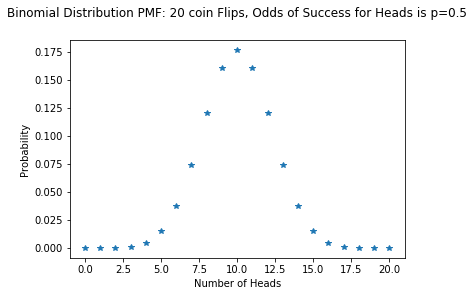

In [17]:
# visualize using plots

import matplotlib.pyplot as plt
%matplotlib inline
# For simple plots, matplotlib is fine, seaborn is unnecessary.

# Now simply use plot
plt.plot(x,Y,'*')

#Title (use y=1.08 to raise the long title a little more above the plot)
plt.title('Binomial Distribution PMF: 20 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)

#Axis Titles
plt.xlabel('Number of Heads')
plt.ylabel('Probability')

In [18]:
# Poisson Distribution

# Set lambda
lamb = 10

# Set k to the number of occurences
k=7

#Set up e and factorial math statements
from math import exp
from math import factorial
from __future__ import division

# Now put the probability mass function
prob = (lamb**k)*exp(-lamb)/factorial(k)

# Put into percentage form and print answer
print (' There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*prob))

 There is a 9.01 % chance that exactly 7 customers show up at the lunch rush


In [19]:
# above code creates the PMF manually, let's see how to do it automatically with scipy.

# Import the dsitrubtion from scipy.stats
from scipy.stats import poisson

# Set our mean = 10 customers for the lunch rush
mu = 10

# Then we can get the mean and variance
mean,var = poisson.stats(mu)

# We can also calculate the PMF at specific points, such as the odds of exactly 7 customers
odds_seven = poisson.pmf(7,mu)

#Print
print ('There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*odds_seven))

# Print the mean
print ('The mean is %2.2f ' %mean)

# Print the var

print ('The var is %2.2f ' %var)

There is a 9.01 % chance that exactly 7 customers show up at the lunch rush
The mean is 10.00 
The var is 10.00 


In [20]:
# What if more than 10 customers show up 
# Now let's get the PMF and plot it

# First the PMF
import numpy as np

#  PMF for all the way to 30 customers,
k=np.arange(30)

# Average of 10 customers for the time interval
lamb = 10

#The PMF we'll use to plot
pmf_pois = poisson.pmf(k,lamb)




<Container object of 30 artists>

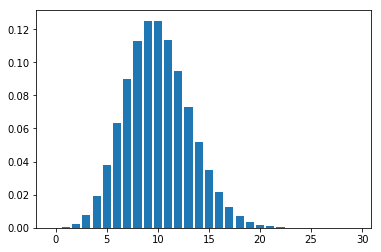

In [21]:
# We can now plot it simply by
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Simply call a barplot
plt.bar(k,pmf_pois)

In [23]:


# Set out k = 10 for ten customers, set mean = 10 for the average of ten customers during lunch rush.
k,mu = 10,10

# The probability that 10 or less customers show up is:
prob_up_to_ten = poisson.cdf(k,mu)

#print
print ('The probability that 10 or less customers show up is %2.1f %%.' %(100*prob_up_to_ten))

prob_more_than_ten = 1 - prob_up_to_ten

print ('The probability that more than ten customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_ten))

The probability that 10 or less customers show up is 58.3 %.
The probability that more than ten customers show up during lunch rush is 41.7 %.


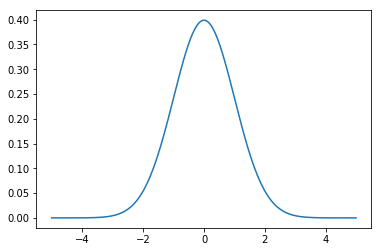

In [24]:
### Normal Distribution

import matplotlib.pyplot as plt
%matplotlib inline

#Import the stats library
from scipy import stats

# Set the mean
mean = 0

#Set the standard deviation
std = 1


# Create a range
X = np.arange(-5,5,0.01)

#Create the normal distribution for the range
Y = stats.norm.pdf(X,mean,std)

#
plt.plot(X,Y)

In [25]:
# Use numoy to create the distribution

import numpy as np

#Set the mean and the standard deviaiton
mu,sigma = 0,1

# Now grab 1000 random numbers from the normal distribution
norm_set = np.random.normal(mu,sigma,1000)

(array([ 2.,  1.,  0.,  3.,  3.,  5.,  1.,  5.,  5., 16., 16., 13., 15.,
        21., 16., 27., 25., 40., 27., 49., 32., 39., 47., 45., 46., 50.,
        48., 45., 41., 45., 47., 45., 24., 27., 27., 15., 12., 19., 10.,
        10.,  7., 11.,  5.,  1.,  4.,  2.,  0.,  2.,  2.,  2.]),
 array([-3.09549702, -2.97196697, -2.84843692, -2.72490687, -2.60137682,
        -2.47784677, -2.35431672, -2.23078667, -2.10725662, -1.98372657,
        -1.86019652, -1.73666647, -1.61313642, -1.48960637, -1.36607632,
        -1.24254627, -1.11901622, -0.99548617, -0.87195612, -0.74842607,
        -0.62489602, -0.50136597, -0.37783592, -0.25430587, -0.13077582,
        -0.00724577,  0.11628428,  0.23981433,  0.36334438,  0.48687443,
         0.61040448,  0.73393453,  0.85746458,  0.98099463,  1.10452468,
         1.22805473,  1.35158478,  1.47511483,  1.59864488,  1.72217493,
         1.84570498,  1.96923503,  2.09276508,  2.21629513,  2.33982518,
         2.46335523,  2.58688528,  2.71041533,  2.83394538,

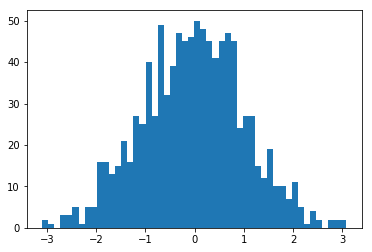

In [26]:
import seaborn as sns

plt.hist(norm_set,bins=50)

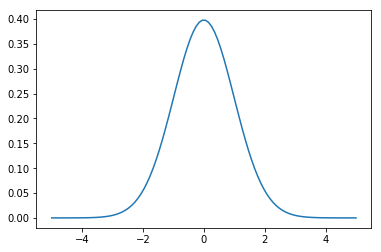

In [29]:
# use t disribution for small samples

#Import for plots
import matplotlib.pyplot as plt
%matplotlib inline

#Import the stats library
from scipy.stats import t

#import numpy
import numpy as np

# Create x range
x = np.linspace(-5,5,100)

# Create the t distribution with scipy
#rv = t(3)  # sample size 3
rv = t(30) # sample size 30
rv = t(100)# sample size 100
# Plot the PDF versus the x range
plt.plot(x, rv.pdf(x))